# Homework 5
Martha Poole
11/29/2015

Below is the code to chart Hinge Loss, Huberized Hinge Loss, and Misclassification error. Huberized hinge loss is similar to hinge loss with the key difference being that the "hinge" for the Huberized hinge appears as a smooth curve, rather than an angle at a specific point, making it differentiable. The misclassification error aligns with the hinge loss in that the the hinge loss decreases as the misclassification error approaches 0. The two functions then appear to converge at 0 for values of x greater than 1.

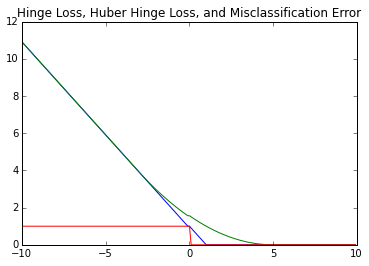

In [1]:
%matplotlib inline
import math
import numpy as np
import sys
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.utils import shuffle
from matplotlib import colors
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing

def hinge(y, t):
	return max(0, 1-y*t)

def huber_hinge(y, t, h):
	if y*t > 1+h:
		return 0.
	elif abs(1-y*t) <= h:
		numerator = math.pow((1+h-y*t), 2)
		denominator = 4.*h
		return numerator/denominator
	else:
		return 1-y*t

def misclassificationError(y, t):
	if y*t <= 0 :
		return 1
	else:
		return 0
    
#prints a graph of the misclassification error, hinge loss and huber hinge loss
def printGraph():
	yt = np.arange(-10, 10, 0.1)
	t = np.arange(0, 10, 0.1)
	hingeOutput =[]
	huber_hingeOutput =[]
	misclassificationOutput =[]
	for val in reversed(t):
		hingeOutput.append(hinge(-1, val))
		huber_hingeOutput.append(huber_hinge(-1, val, 4))
		misclassificationOutput.append(misclassificationError(-1, val))
	for val in t:
		hingeOutput.append(hinge(1, val))
		huber_hingeOutput.append(huber_hinge(1, val, 4))
		misclassificationOutput.append(misclassificationError(1, val))
	splot = plt.figure(7)
	plt.plot(yt, hingeOutput)
	plt.plot(yt, huber_hingeOutput)
	plt.plot(yt, misclassificationOutput)
	plt.title("Hinge Loss, Huber Hinge Loss, and Misclassification Error")
    
printGraph()

Below is the gradient for the huber- hinge loss:

$\nabla{l_{huber-hinge}}:=\left\{
                \begin{array}{ll}
                  {0} & {if \; yt > 1 + h}\\
                  {\frac{-t(1+h-yt)}{2h}-\frac{y(1+h-yt)}{2h}} & {if \; \mid1 − yt\mid ≤ h}\\
                  {-y-t} & {if \; yt < 1 − h} 
                \end{array}
              \right.$


In order to prove that the huber-hinge loss function is differentiable. We will begin by computing the partial derivatives for the huber hinge loss.

$\frac{\partial l}{\partial y}=\left\{
                \begin{array}{ll}
                  {0} & {if \; yt > 1 + h}\\
                  {\frac{-t(1+h-yt)}{2h}} & {if \; \mid1 − yt\mid ≤ h}\\
                  {-t} & {if \; yt < 1 − h} 
                \end{array}
                \right.$
                
                
$\frac{\partial l}{\partial t}=\left\{
                \begin{array}{ll}
                  {0} & {if \; yt > 1 + h}\\
                  {\frac{-y(1+h-yt)}{2h}} & {if \; \mid1 − yt\mid ≤ h}\\
                  {-y} & {if \; yt < 1 − h} 
                \end{array}
                \right.$

Each of these pieces are differentiable, as given by above. We need to prove that there are equal derivatives at the point where each piece meets, namely at ${yt=1+h}$ and ${yt =1-h}$

For ${yt=1+h}$ on the left-hand side we have a trivial case. The derivative is 0. On the left-hand side we substitute ${yt=1+h}$ into ${\frac{-t(1+h-yt)}{2h}}$  and we get ${\frac{\partial l}{\partial y}=\frac{-t(1+h-(1+h))}{2h}} = {\frac{-t(0)}{2h}} = {0}$. Similarly for $\frac{\partial l}{\partial t} = {\frac{-y(1+h-yt)}{2h}} = {\frac{-y(1+h-(1+h)}{2h}} = {\frac{-y(0)}{2h}} = {0}$. The derivatives are equal on either side.

For ${yt =1-h}$ on the right-hand side the derivative of ${\frac{\partial l}{\partial y}}$ is -t. On the left-hand side for ${\frac{\partial l}{\partial y}}={\frac{-t(1+h-yt)}{2h}} = {\frac{-t(1+h-(1-h))}{2h}} = {\frac{-t(2h)}{2h}} = {-t}$. For $\frac{\partial l}{\partial t}$ on the right-hand side the derivative is -y. On the left-hand side $\frac{\partial l}{\partial t} = {\frac{-y(1+h-yt)}{2h}} = {\frac{-y(1+h-(1-h))}{2h}} = {\frac{-y(2h)}{2h}} = -y$. The derivatives are equal on either side.

So, we can say that the hinge-loss function is differentiable for all values of y and t.

Below is a proof of lipschitzness for the huber-hinge loss. For convenience, let us treat ${yt}$ as a single variable ${x}$. So we have the huber-hinge function defined as:

${l_{huber-hinge(x)}}=\left\{
                \begin{array}{ll}
                  {0} & {if \; x > 1 + h}\\
                  {\frac{(1+h-x)^2}{4h}} & {if \; \mid1 − x\mid ≤ h}\\
                  {1-x} & {if \; x < 1 − h} 
                \end{array}
              \right.$
            
And we can assume that the derivative is consistent with our partial derivatives above. From page 161 of the book, we know that ${f(w_1) - f(w_2) = f'(u)(w_1 - w_2)}$. So if we can prove that our derivative is bounded, then we can prove Lipschitzness.  For ${x >1 +h}$ we know that the derivative is always equal to 0, so we have ${\rho = 0}$. For ${\mid1 − x\mid ≤ h}$ our derivative is ${\frac{-(1+h-x)}{2h}}$ which is not bounded over the entire range of x, but is in fact bounded locally for ${\mid1 − x\mid ≤ h}$. We substitute in ${h}$ and ${-h}$ for either end of the range. we get:  ${{\frac{-(1+h-x)}{2h}} = {\frac{-(h-h)}{2h}} = {0}} $ && ${{\frac{-(1+h-x)}{2h}} = {\frac{-(h+h)}{2h}} = {-1}}$. So ${\rho}$ is bounded by -1 on one side, and 0 on the other. For ${x < 1 − h}$ our derivative is -1, so ${\rho = -1}$


Below is the gradient for our optimization function:

$\nabla{F(w)}:={2}{w} + \left\{
                \begin{array}{ll}
                  {0} & {if \; yf(x_i) > 1 + h}\\
                  \dfrac{C}{n}\sum_{i=1}^{n}\frac{(-yx_i)(1+h-yw^Tx_i)}{2h} & {if \; \mid1 − yf(x_i)\mid ≤ h}\\
                  \dfrac{C}{n}\sum_{i=1}^{n}{-yx_i} & {if \; yf(x_i) < 1 − h} 
                \end{array}
              \right.$

Below is the python code for computing the objective function, gradient, grad_checker, and the initial gradient descent function:


In [2]:
def compute_obj(C, h, w, points, labels):
	norm = math.pow(np.linalg.norm(w),2)
	summation =0
	for idx, point in enumerate(points):
		summation +=huber_hinge(labels[idx], f(w, point), h)
	return (summation/float(len(points)) * C) + norm

def compute_grad(C, h, w, points, labels):
	gradient = 2*w
	for index, point in enumerate(points):
		t = f(w, point)
		y = labels[index]
		if abs(1 -y*t) <= h:
			numerator = (C * (-y * point) * (1+h - y*t))
			denominator = (2.0 * h * len(points))
			gradient = gradient + numerator / denominator
		elif y*t < 1-h :
			numerator = (C * -y * point)
			denominator = float(len(points))
			gradient = gradient + numerator / denominator
	return gradient

def grad_checker(C, h, w, points, labels, delta, epsilon):
	numerator = compute_obj(C, h, w + epsilon * delta, points, labels) - compute_obj(C, h, w - epsilon * delta, points, labels)
	denominator = 2.0 * epsilon
	return numerator/denominator

def my_gradient_descent(C, h, points, labels, max_iter, eta, cg, co):
	w = np.zeros(points[0].shape, dtype=float)
	for i in range(0, max_iter):
		print(w)
		grad = cg(C, h, w, points, labels)
		w = w - eta* grad
	return w


Below are functions that generate plots illustrating misclassification of training and test sets during gradient descent iteration, the movement of w, the change in objective function per iteration, and the data points bisected by the final w vector.

I have an as-yet unresolved concern about the misclassification error for the w vector. It seems that my gradient descent algorithm converges very quickly (within 1 to 2 iterations) for etas as large at 0.5 and as small as 0.0001. This was true of multiple datasets that I tried. I tried datasets that were overlapping, ones that were not, and in either case the misclassification errors were believable (i.e. for overlapping datasets, more points were misclassified, and for non-overlapping datasets, misclassification was zero). I tried varying the dimensions within a small range-- no perceivable change. I charted the movement of w also to help me understand what's happening. I also changed the w vector, to start with a vector other than a series of zeros. This produced the expected result, where it took more time for a vector that was a series of -1's to converge. 

Finally, I tried this with a high-dimensional dataset (500-1000 features) and found that it did take longer to converge for these datasets. 

My suspicion is that because my synthetic datasets have different means, when they are normalized they are easily bisected. Also starting out with a dataset with a small number of features caused the algorithm to quickly converge.

/Users/mep62/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:46: RuntimeWarning: invalid value encountered in double_scalars
/Users/mep62/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


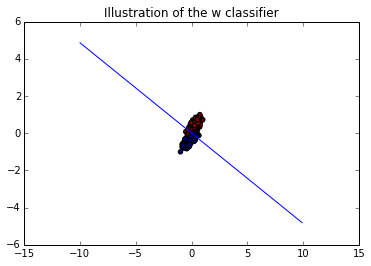

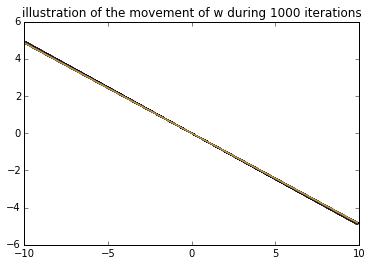

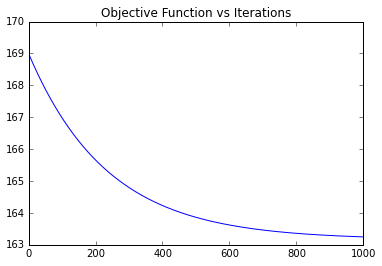

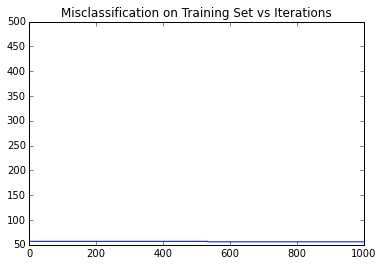

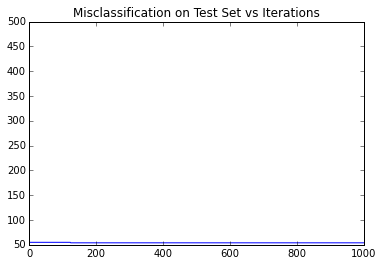

In [4]:
import math
import numpy as np
import sys
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.utils import shuffle
from matplotlib import colors
#version of gradient descent to use for plotting figures on objective function and misclassification
def my_gd_per_iter(C, h, points, labels, max_iter, eta, cg, co, testPoints, testLabels):
	w = np.zeros(points[0].shape, dtype=float)
	iters = []
	misclassErrorTrain = []
	misclassErrorTest =[]
	objFunc = []
	Ws = []
	for i in range(0, max_iter):
		iters.append(i)
		misclass = totalMisclassificationError(points, labels, w)
		misclassErrorTrain.append(misclass)
		misclassTest = totalMisclassificationError(testPoints, testLabels, w)
		misclassErrorTest.append(misclassTest)
		Ws.append(w)
		objFunc.append(compute_obj(C, h, w, points, labels))
		grad = cg(C, h, w, points, labels)
		w = w - eta* grad
	return [iters, misclassErrorTrain, misclassErrorTest, objFunc, Ws]

#plot functions
def plot_data(X, y, fig_index, w, title):
    splot = plt.figure(2)  
    plt.scatter(X[:, 0], X[:, 1], c=y)
    x_w, y_w = w_for_graph(w)
    plt.plot(x_w, y_w)
    plt.plot()
    plt.title(title)

def f(w, x):
	return np.dot(w, x)

#takes w and generates x and y output for graphing
def w_for_graph(w):
	x = np.arange(-10, 10, 0.1)
	y =[]
	np.arange(-10, 10, 0.1)
	for i in x:
		y.append((-w[0]/w[1])*i)
	return np.array([x, y])

#plots the change in w over iterations 
def plot_w(Ws):
    splot = plt.figure(3)  
    for w in Ws:
	    x_w, y_w = w_for_graph(w)
	    plt.plot(x_w, y_w)
    plt.plot()
    plt.title("illustration of the movement of w during 1000 iterations")
    
def objFunc_vs_Iteration(objFunc, Iter):
	splot = plt.figure(4)
	plt.plot(objFunc, Iter)
	plt.title("Objective Function vs Iterations")

def misClassTrain_vs_iteration(misTrain, Iter):
	splot = plt.figure(5)
	plt.plot(misTrain, Iter)
	plt.title("Misclassification on Training Set vs Iterations")

def misClassTest_vs_iteration(misTest, Iter):
	splot = plt.figure(6)
	plt.plot(misTest, Iter)
	plt.title("Misclassification on Test Set vs Iterations")

# center data and set within range [-1, +1]
def normalize(data):
	preprocessing.scale(data, 0, True, False, False)
	preprocessing.MinMaxScaler((-1, 1), False).fit_transform(data)
	return data

# generate datasets
#from here http://scikit-learn.org/stable/auto_examples/classification/plot_lda_qda.html#example-classification-plot-lda-qda-py
def dataset_fixed_cov():
    '''Generate 2 Gaussians samples with the same covariance matrix'''
    n, dim = 500, 2
    np.random.seed(52686)
    C = np.array([[0., -0.23], [0.83, .23]])
    X = np.r_[np.dot(np.random.randn(n, dim), C),
              np.dot(np.random.randn(n, dim), C) + np.array([1, 1])]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y

#hacky thing to deal with labels not being 1 or -1
def convertLabels(labels):
	for idx, label in enumerate(labels):
		if label==0:
			labels[idx] =  -1
	return labels

def totalMisclassificationError(points, labels, w):
	total =0
	for idx, point in enumerate(points):
		total += misclassificationError(f(point, w), labels[idx])
	return total
    
data, labels = dataset_fixed_cov()
train_target, test_target, train_data, test_data = train_test_split(labels, data, train_size=0.5, random_state=5261986)
train_data = normalize(train_data)
test_data = normalize(test_data)
train_target = convertLabels(train_target)
test_target = convertLabels(test_target)
output = my_gd_per_iter(25, 25, train_data, train_target, 1000, 0.001, compute_grad, compute_obj, test_data, test_target)
plot_data(train_data, train_target, 1, output[4][len(output[4])-1], "Illustration of the w classifier")
plot_w(output[4])
objFunc_vs_Iteration(output[0], output[3])
misClassTrain_vs_iteration(output[0], output[1])
misClassTest_vs_iteration(output[0], output[2])

I ran a grid search on the best value of C for possible values of 1-20 for both a  high-dimensional data set of 1000 features, and a low-dimensional data set of 2 features. For high-dimensional data sets I found that C=1 had the least number of iterations, and C=4 had the best misclassification error value. For a low-dimensional dataset, a value of C=19 had the least misclassification errors.

The source code for my best value search function is below:

In [8]:
def best_value_C(h, points, labels, cg, co, max_iter=1000, optimizationCriteria =False, performanceCriteria = False):
	bestError = sys.maxint
	bestErrorC = 0
	bestIter = sys.maxint
	bestIterC = 0
	for i in range(1, 20):
		returnStuff = optimized_gradient_descent(i, h, points, labels, cg, co, max_iter, optimizationCriteria, performanceCriteria)
		if returnStuff[1] < bestIter:
			bestIter = returnStuff[1]
			bestIterC = i
		if returnStuff[2] < bestError:
			bestError = returnStuff[2]
			bestErrorC = i
	print ("least number of iterations is ")
	print(bestIterC)
	print("with this many iterations:")
	print(bestIter)
	print("smallest misclassificationError is ")
	print(bestErrorC)
	print("with this many misclassifications")
	print(bestError)
    
def random_dataset(n, dim):
	np.random.seed(0)
	C = np.random.rand(dim, dim)
	X = np.r_[np.dot(np.random.randn(n, dim), C), np.dot(np.random.randn(n, dim), C.T) + np.random.rand(1, dim)]
	y = np.hstack((np.zeros(n), np.ones(n)))
	return X, y

#check for small dimensions
data, labels = random_dataset(500, 2)
train_target, test_target, train_data, test_data = train_test_split(labels, data, train_size=0.5, random_state=5261986)
train_data = normalize(train_data)
test_data = normalize(test_data)
train_target = convertLabels(train_target)
test_target = convertLabels(test_target)
best_value_C(1, train_data, train_target, compute_grad, compute_obj)

#check for large dimensions
data, labels = random_dataset(500, 1000)
train_target, test_target, train_data, test_data = train_test_split(labels, data, train_size=0.5, random_state=5261986)
train_data = normalize(train_data)
test_data = normalize(test_data)
train_target = convertLabels(train_target)
test_target = convertLabels(test_target)

KeyboardInterrupt: 

Below is the implemenation, along with associated helper functions, of the optimized gradient descent, which uses backtracking line search, performance and optimization based criteria.

In [12]:
def optimized_gradient_descent(C, h, points, labels, cg, co, max_iter = 1000, optimizationCriteria = False, performanceCriteria = False):
	w = np.zeros(points[0].shape, dtype=float)
	#create a queue for testing history of performance
	queue = []
	iter =0
	error = 100
	#create a subsample for testing misclassification error
	subsample_target, subsample_data= shuffle (labels, points, n_samples = 100, random_state=5261986)
	for i in range(0, max_iter):
		error = totalMisclassificationError(subsample_data, subsample_target, w)
		iter =i
		grad = cg(C, h, w, points, labels)
		if optimizationCriteria:
			if checkOptimizationCriteria(grad, 0.01):
				print("breaking because of optimization")
				break
		if performanceCriteria:
# 			print("error")
# 			print(error)
			if len(queue) == 10:
			 	queue.pop(0)
# 			 	print("error")
# 			 	print(error)
			 	if checkPerformanceCriteria(queue, error, 0.9):
			 		print("breaking because of performance")
			 		break
			queue.append(error)
		w = w - getBestEta(C, h, points, labels, w, grad, co)* grad
	return [w, iter, error]

def totalMisclassificationError(points, labels, w):
	total =0
	for idx, point in enumerate(points):
		total += misclassificationError(f(point, w), labels[idx])
	return total

def misclassificationError(y, t):
	if y*t <= 0 :
		return 1
	else:
		return 0
    
# returns true if the optimization criteria has been met or exceeded, false if not
def checkOptimizationCriteria(grad, epsilon):
# 	print(np.linalg.norm(grad))
	if np.linalg.norm(grad) <= epsilon:
		return True
	else:
		return False
    
#returns true if the performance criteria has been met or exceeded, false if not
def checkPerformanceCriteria(queue, error, rho):
	mini =0
	if len(queue) == 0:
		mini = sys.maxint
	else:
		mini = min(queue)
# 	print("mini is")
# 	print(mini)
	if error > rho * mini:
		return True
	else:
		return False
    
#implementation of backtracking line search
def getBestEta(C, h, points, labels, w, grad, co):
	best = 0.1
	for k in range(0, 10):
		val = best * math.pow(1.1, k)
		if co(C, h, w- best * grad, points, labels) > co(C, h, w-val*grad, points, labels):
			best = val
		else:
			break
	return best

data, labels = random_dataset(500, 2)
train_target, test_target, train_data, test_data = train_test_split(labels, data, train_size=0.5, random_state=5261986)
train_data = normalize(train_data)
test_data = normalize(test_data)
train_target = convertLabels(train_target)
test_target = convertLabels(test_target)
print(optimized_gradient_descent(1, 17, train_data, train_target, compute_grad, compute_obj, performanceCriteria=True, optimizationCriteria=True))


breaking because of performance
[array([ 0.00878029,  0.04335263]), 10, 32]


Below is an implementation of my_svm that uses the optimized gradient descent function

In [14]:
def my_svm(C, h, points, labels, cg, co, max_iter=1000, optimizationCriteria = False, performanceCriteria = False):
	train_target, test_target, train_data, test_data = train_test_split(labels, points, train_size=0.5, random_state=5261986)
	test_data = normalize(test_data)
	train_data = normalize(train_data)
	w, iter, error = optimized_gradient_descent(C, h, train_data, train_target, cg, co, max_iter, optimizationCriteria, performanceCriteria)
	totalCorrect = 0
	totalIncorrect = 0
	for idx, point in enumerate(test_data):
		if classifier(w, point) == test_target[idx]:
			totalCorrect += 1
	return [w, totalCorrect/float(len(test_data))]

def classifier(w, x):
	return 1 if f(w, x) > 0 else -1

print(my_svm(1, 17, train_data, train_target, compute_grad, compute_obj, performanceCriteria=True, optimizationCriteria=True))

breaking because of performance
[array([ 0.01524101,  0.04836858]), 0.648]


Below is an implementation of my_sgd which incorporates performance optimization criteria:

In [18]:
def my_sgd (C, h, points, labels, cg, co, max_iter = 1000, performanceCriteria = False):
	w = np.zeros(points[0].shape, dtype=float)
	#create a queue for testing history of performance
	queue = []
	#create a subsample for testing misclassification error
	subsample_target, subsample_data= shuffle (labels, points, n_samples = 100, random_state=5261986)
	for i in range(0, max_iter):
		labels, points = shuffle (labels, points)
		for idx, point in enumerate(points):
			grad = cg(C, h, w, point, labels[idx])
			if performanceCriteria:
				error = totalMisclassificationError(subsample_data, subsample_target, w)
# 				print("error")
# 				print(error)
				if len(queue) == 10:
				 	queue.pop(0)
				 	if checkPerformanceCriteria(queue, error, 0.9):
				 		print("breaking because of performance")
				 		return w
				queue.append(error)
			w = w - getBestEta(C, h, points, labels, w, grad, co)* grad
	return w

#helper function for computing the gradient on a specific point, used for stochastic gradient descent
def compute_grad_point(C, h, w, point, label):
	gradient = 2*w
	t = f(w, point)
	y = label
	if abs(1 -y*t) <= h:
		numerator = (C * (-y * point) * (1+h - y*t))
		denominator = (2.0 * h)
		gradient = gradient + numerator / denominator
	elif y*t < 1-h :
		numerator = (C * -y * point)
		gradient = gradient + numerator
	return gradient

print(my_sgd(1, 17, train_data, train_target, compute_grad_point, compute_obj, performanceCriteria = True))

breaking because of performance
[-0.01172091  0.02519548]


This is the graph of the change in the objective function per epoch. As you can see it seems to oscillate unpredictably per epoch. Similarly, an additional graph below illustrates that the change in misclassification error is somewhat unpredictable from epoch to epoch, though it does seem to be an improvement over random. Note that I also tested this for 100 iterations, and small dimensionality (2) vs large(1000 features), with the results being somewhat similar. I am doubtful that this is the expected outcome (I'm wondering if there is a bug in my code). Though I suppose that a good result could be obtained if we kept the w vector from the iteration with the least misclassification error, but this presents us with little potential to optimize in terms of iterations:

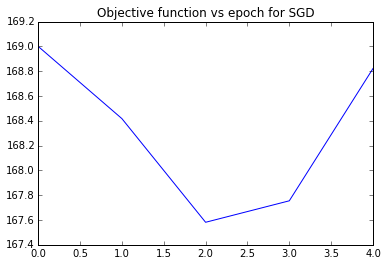

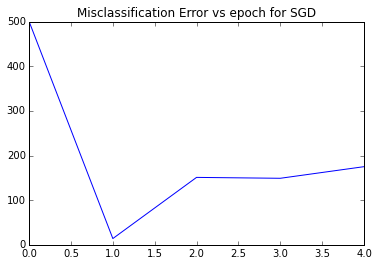

In [20]:
#used for plotting values per epoch
def my_sgd_per_epoch (C, h, points, labels, cg, co, max_iter = 1000, performanceCriteria = False):
	w = np.zeros(points[0].shape, dtype=float)
	#create a queue for testing history of performance
	queue = []
	#create a subsample for testing misclassification error
	subsample_target, subsample_data= shuffle (labels, points, n_samples = 100, random_state=5261986)
	objFunc=[]
	errorPerEpoch =[]
	for i in range(0, max_iter):
		objFunc.append(compute_obj(C, h, w, points, labels))
		errorPerEpoch.append(totalMisclassificationError(points, labels, w))
		labels, points = shuffle (labels, points)
		for idx, point in enumerate(points):
			grad = cg(C, h, w, point, labels[idx])
			if performanceCriteria:
				error = totalMisclassificationError(subsample_data, subsample_target, w)
				if len(queue) == 10:
				 	queue.pop(0)
				 	print("error")
				 	print(error)
				 	if checkPerformanceCriteria(queue, error, 0.9):
				 		print("breaking because of performance")
				 		return w
				queue.append(error)
			w = w - getBestEta(C, h, points, labels, w, grad, co)* grad
	return [w, objFunc, errorPerEpoch]

#plots the objective function per epoch for sgd
def objFunc_vs_epoch(objFunc):
	x = np.arange(0, len(objFunc), 1.)
	splot = plt.figure(8)
	plt.plot(x, objFunc)
	plt.title("Objective function vs epoch for SGD")

def error_vs_epoch(error):
	x = np.arange(0, len(error), 1.)
	splot = plt.figure(10)
	plt.plot(x, error)
	plt.title("Misclassification Error vs epoch for SGD")
    
train_target, test_target, train_data, test_data = train_test_split(labels, data, train_size=0.5, random_state=5261986)
train_data = normalize(train_data)
test_data = normalize(test_data)
train_target = convertLabels(train_target)
test_target = convertLabels(test_target)
output = my_sgd_per_epoch (25, 25, train_data, train_target, compute_grad_point, compute_obj, max_iter =50)
objFunc_vs_epoch(output[1])
error_vs_epoch(output[2])

Below is the time required to run a single epoch of the sgd algorithm on my machine, with C=1, 500 samples of 2 dimensions

real	0m3.855s
user	0m3.541s
sys	0m0.215s

Below is the time required to run a single iteration of gradient descent on my machine

real	0m1.780s
user	0m0.743s
sys	0m0.296s

GD seems to be much faster. I assume this is because we're not iterating through and computing the gradient point-wise (this is the only significant difference between the two algorithms).

However, because my algorithm seems to converge extremely quickly, using optimizations seems advantageous, so we don't have to cycle through the max number of iterations of epochs.  With this optimization, we can expect that SGD will converge much more quickly, because we don't even need to cycle through the whole set of data points in order to short circuit and return the best w. Here is the run time performance:

Below is the time required to run the performance-optimized SGD algorithm for one epoch. C=1, 500 samples of 2 dimensions:

real	0m2.300s
user	0m0.821s
sys	0m0.363s

Time to run performance-optimized GD algorithm for one iteration.  C=1, 500 samples of 2 dimensions:

real	0m2.207s
user	0m0.946s
sys	0m0.319s

Below is the time required to run the performance-optimized SGD algorithm for one epoch. C=1, 500 samples of 1000 dimensions:

real	0m1.707s
user	0m1.411s
sys	0m0.265s

Time to run performance-optimized GD algorithm for one iteration. C= 1, 500 samples, 1000 dimensions:

real	0m5.386s
user	0m1.680s
sys	0m0.587s

Time to run performance and gradient-optimized GD algorithm for one iteration. C= 1, 500 samples, 1000 dimensions:
real	0m1.857s
user	0m1.553s
sys	0m0.272s

Time required to run the performance-optimized SGD algorithm for one epoch. C=1, 10000 samples of 1000 dimensions:
real	0m9.802s
user	0m13.021s
sys	0m0.833s

Time to run performance-optimized GD algorithm for one iteration. C= 1, 10000 samples, 1000 dimensions:
real	0m12.804s
user	0m16.370s
sys	0m0.768s

Time to run performance and gradient-optimized GD algorithm for one iteration. C= 1, 10000 samples, 1000 dimensions:
real	0m11.422s
user	0m15.567s
sys	0m0.707s

So it appears that SGD beats out GD as the sample size increases and the dimensionality increases. However, in some cases where multiple performance criteria are used, gradient descent can perform at par with stochastic gradient descent.

Feedback:

It took me many hours to complete this assignment. It was easy to get stuck on some bug or issue and have to write multiple plots and outputs to verify issues. (Some of these I detailed above). I would estimate I spent between 30-40 hours on this assignment. 

I was suprised by the outcome of the classification error for my gradient descent and stochastic gradient descent algorithms. I am curious to confirm or reject my findings. 